<a href="https://colab.research.google.com/github/simulate111/Data-Science_2024/blob/main/Mini%20Project%20II%20%E2%80%93%20Students%20Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas scikit-learn matplotlib seaborn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#Read data
url = 'https://raw.githubusercontent.com/simulate111/Data-Science_2024/main/MP2_Data.csv'
data = pd.read_csv(url)
data.head(3)

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.0,21.88,5.0,5.0,5.0,...,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.0,22.27,5.0,4.0,5.0,...,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.0,27.05,2.5,5.0,5.0,...,0,8,2,0,0,9,0,1,0,3


In [3]:
data.sum()

,0
ID,ML-2020-1ML-2020-2ML-2020-3ML-2020-4ML-2020-6M...
Week2_Quiz1,257.51
Week3_MP1,850.61
Week3_PR1,300.0
Week5_MP2,988.44
Week5_PR2,304.38
Week7_MP3,1549.56
Week7_PR3,255.0
Week4_Quiz2,279.21
Week6_Quiz3,285.0


In [4]:
data.isnull().sum()

,0
ID,0
Week2_Quiz1,0
Week3_MP1,0
Week3_PR1,0
Week5_MP2,0
Week5_PR2,0
Week7_MP3,0
Week7_PR3,0
Week4_Quiz2,0
Week6_Quiz3,0


In [5]:
#Pre-processing
X = data.drop(columns=['ID', 'Week1_Stat1', 'Week1_Stat3', 'Week6_Stat3', 'Week8_Total', 'Week9_Stat3', 'Week8_Stat3', 'Grade'])
y = data['Grade']

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=6)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [8]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [9]:
#Evaluation
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [10]:
print("KNN:")
print(f"MSE: {mse_knn:.2f}")
print(f"R-squared: {r2_knn:.2f}")

print("\nLinear Regression:")
print(f"MSE: {mse_lr:.2f}")
print(f"R-squared: {r2_lr:.2f}")

KNN:
MSE: 0.56
R-squared: 0.86

Linear Regression:
MSE: 0.38
R-squared: 0.90


<BarContainer object of 5 artists>

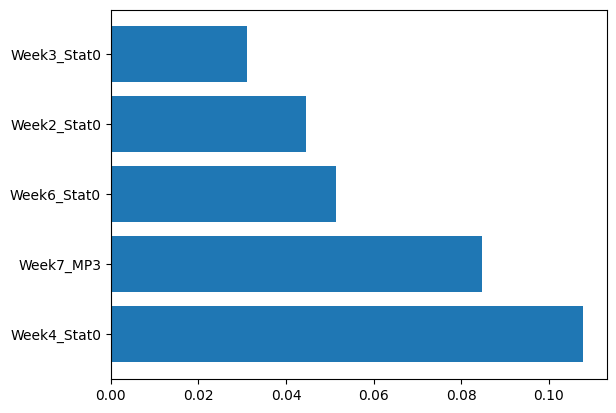

In [11]:
from sklearn.inspection import permutation_importance
# Importance of features
perm_importance = permutation_importance(knn_model, X_test, y_test)
perm_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)
plt.barh(perm_importance_df['Feature'].head(5), perm_importance_df['Importance'].head(5))

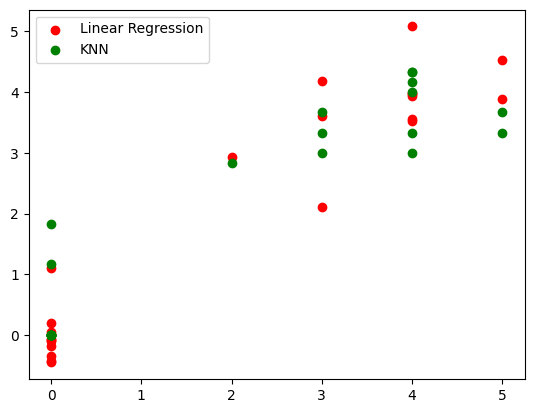

In [12]:
plt.scatter(y_test, y_pred_lr, label='Linear Regression', color='red')
plt.scatter(y_test, y_pred_knn, label='KNN', color='green')
plt.legend()
plt.show()